<a href="https://colab.research.google.com/github/Omethmee/CoureseWork-for-Machine-Learning/blob/main/2425451.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exploratory Data Analysis (EDA) and Preprocessing**

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
#axis = 1 means columns
df = df.drop(['gender','PaperlessBilling','PaymentMethod'], axis=1, errors='ignore')

In [7]:
df.head(5)

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,5575-GNVDE,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,3668-QPYBK,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,7795-CFOCW,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,9237-HQITU,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [8]:
#drop duplicates
df.shape

(7043, 18)

In [9]:
duplicate_rows = df[df.duplicated()]
print(duplicate_rows.shape)
#No duplicates

(0, 18)


In [10]:
#Missing values
df.isnull().sum()

,0
customerID,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [11]:
import seaborn as sns

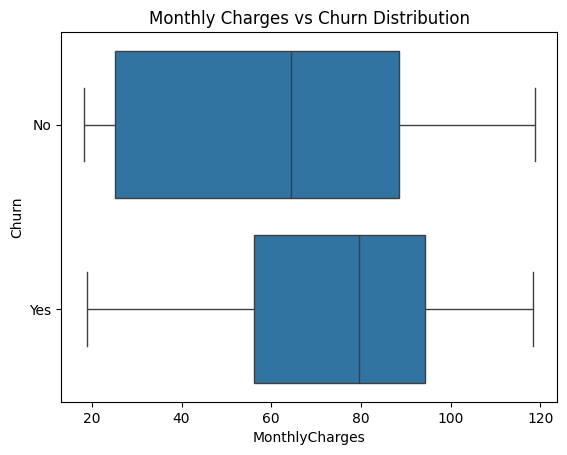

In [12]:
#Outlier MonthlyCharges
sns.boxplot(data=df, x='MonthlyCharges', y='Churn')
plt.title('Monthly Charges vs Churn Distribution')
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


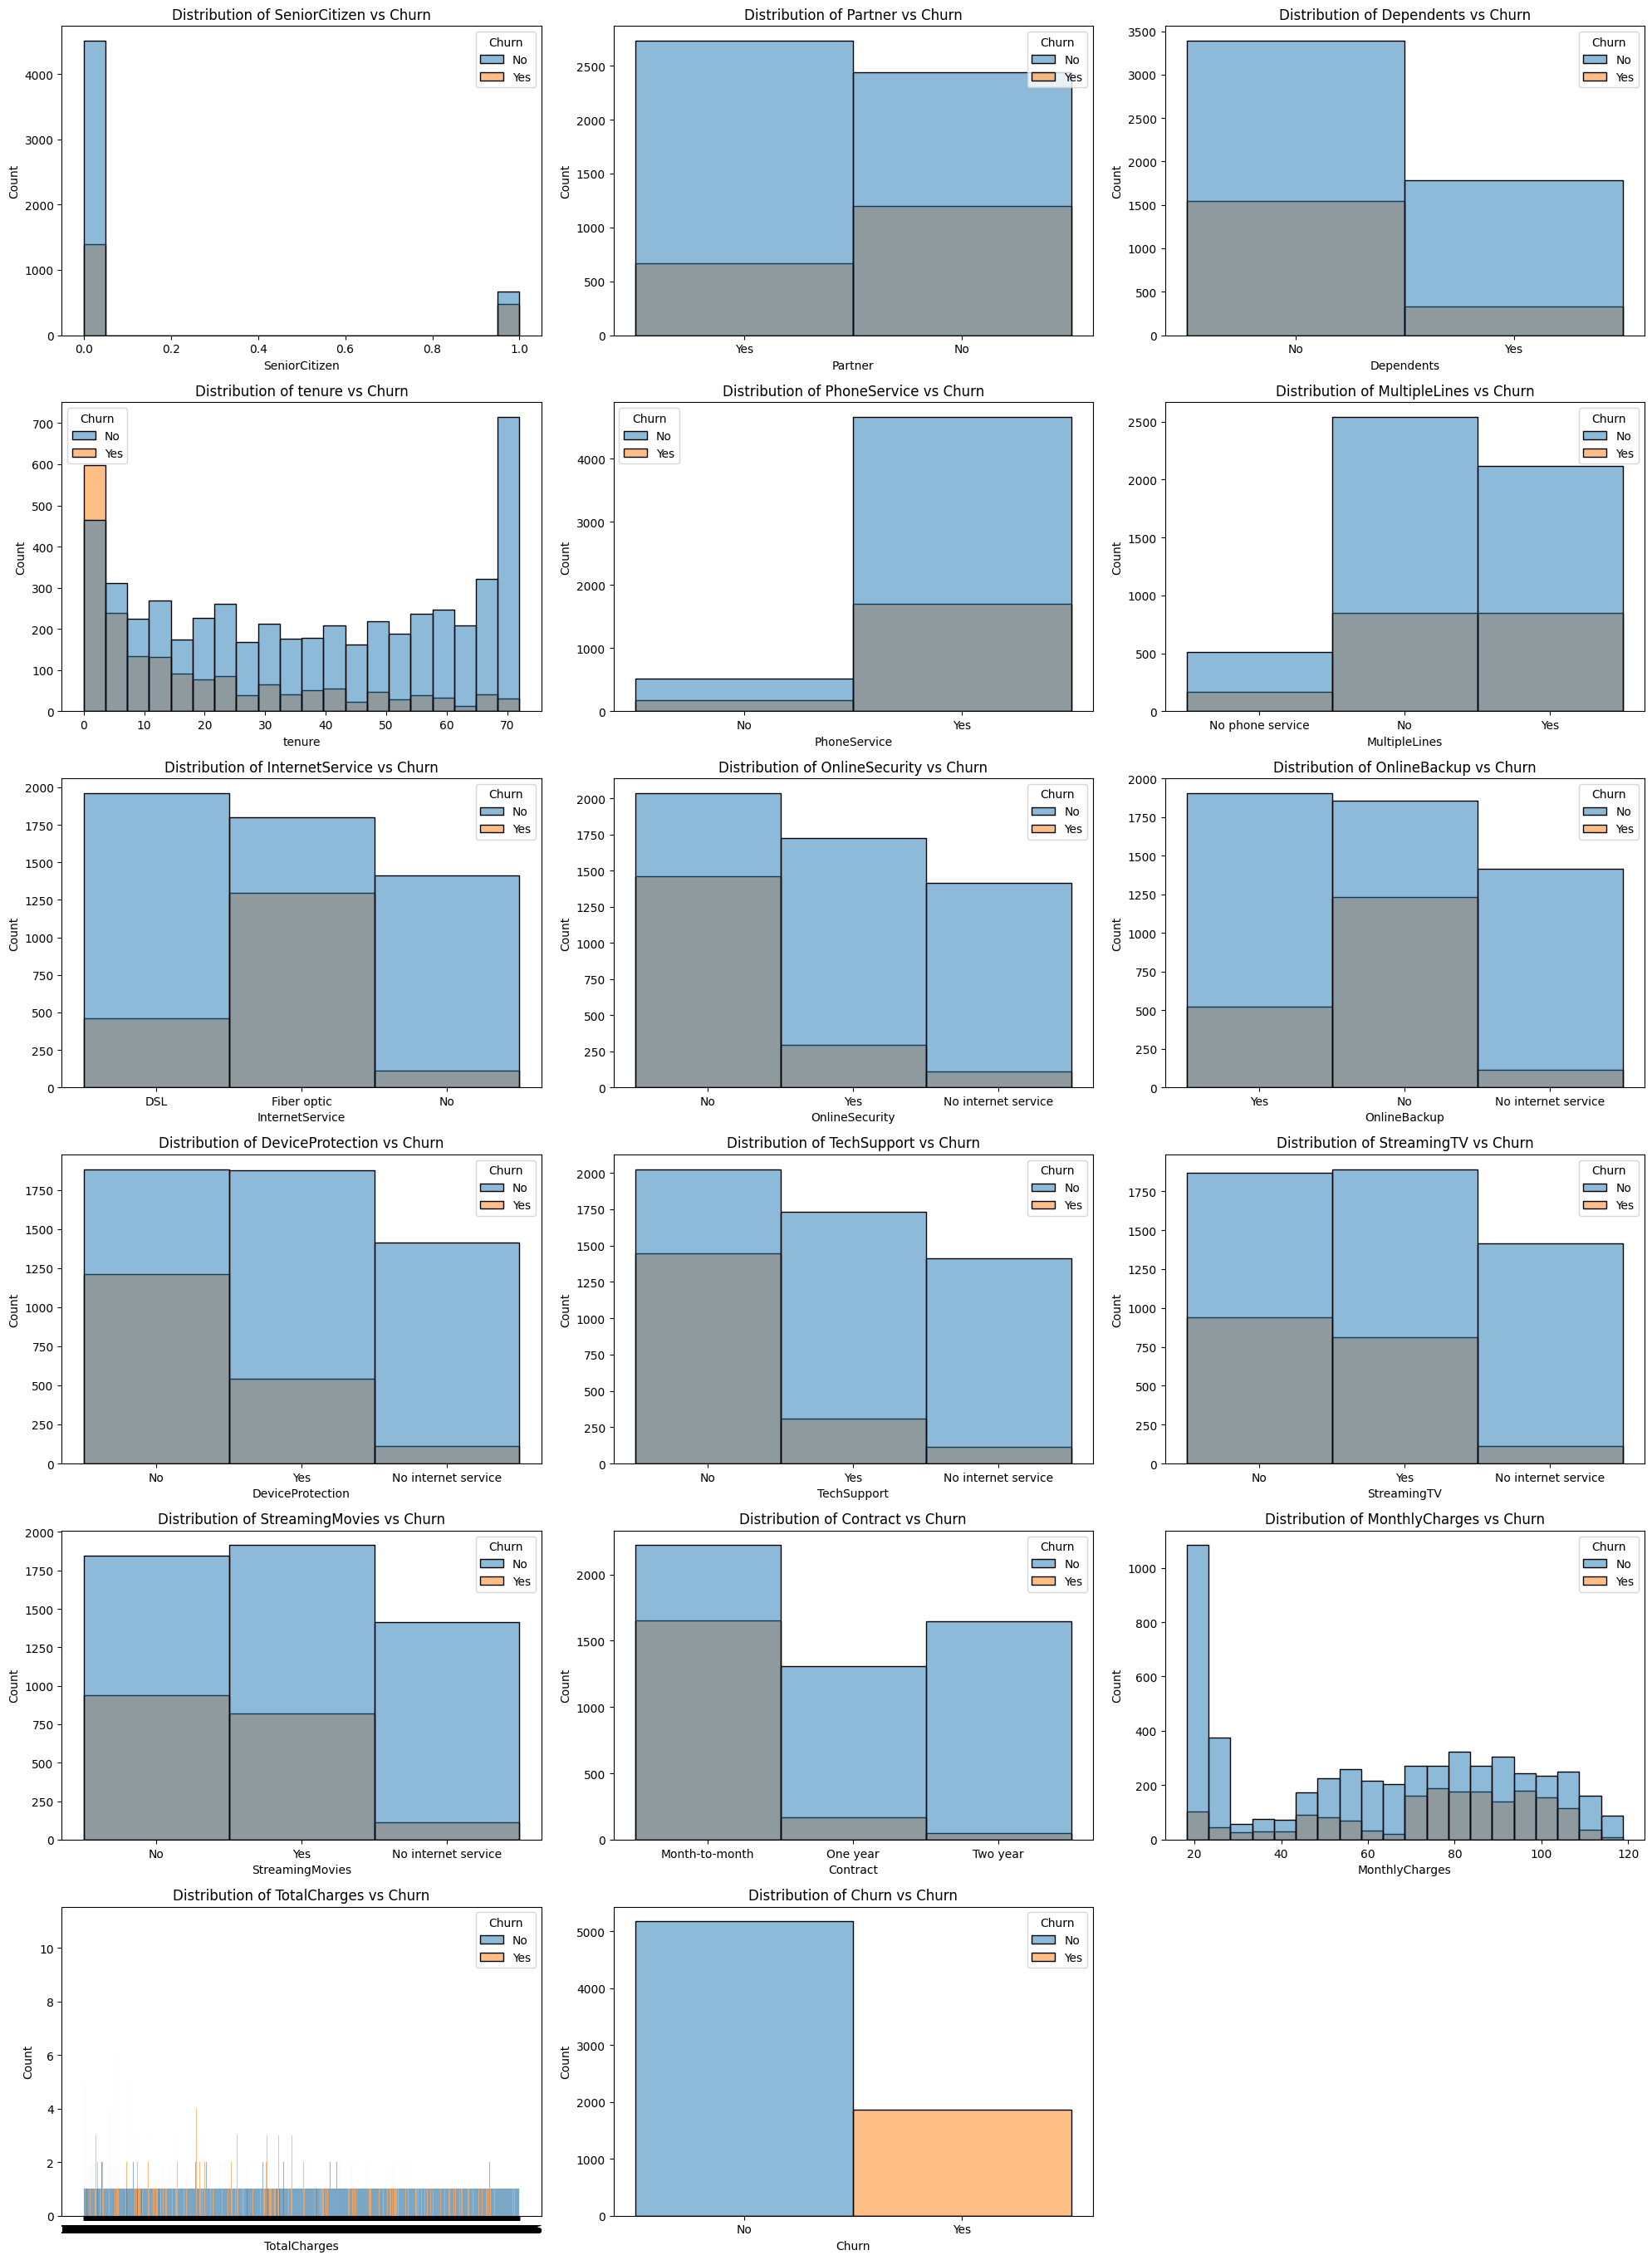

In [13]:
#Columns you said you dropped earlier
dropped_cols = ['gender', 'PaperlessBilling', 'PaymentMethod']

#Keep CustomerID - do not drop it
df_plot = df.drop(columns = dropped_cols, errors='ignore')

#Ensure Churn is categorical (better for histograms)
if df_plot['Churn'].dtype != 'object':
  df_plot['Churn'] = df_plot['Churn'].map({'Yes':1, 'No':0})

#Features to plot - exclude only Customer ID
features = [col for col in df_plot.columns if col not in ['customerID']]

plt.figure(figsize=(20,45))

for i, col in enumerate(features):
  plt.subplot(10, 3, i+1)
  sns.histplot(data=df_plot, x=col, hue='Churn', kde=False, bins=20)
  plt.title(f'Distribution of {col} vs Churn')
  plt.xlabel(col)
  plt.ylabel('Count')

plt.tight_layout()
plt.show()

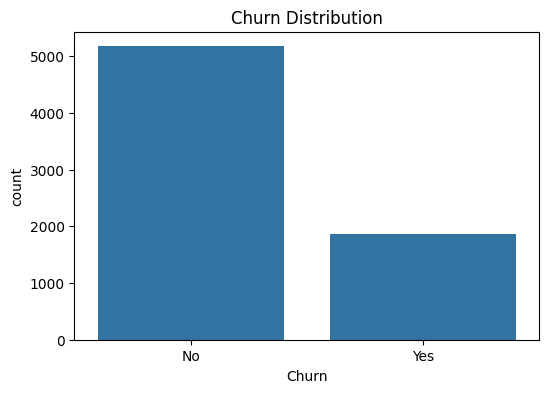

In [14]:
#Plot: Churn Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

In [15]:
#Convert 'TotalCharges' to numeric, coercing errors and filling with NaN with median
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

<function matplotlib.pyplot.show(close=None, block=None)>

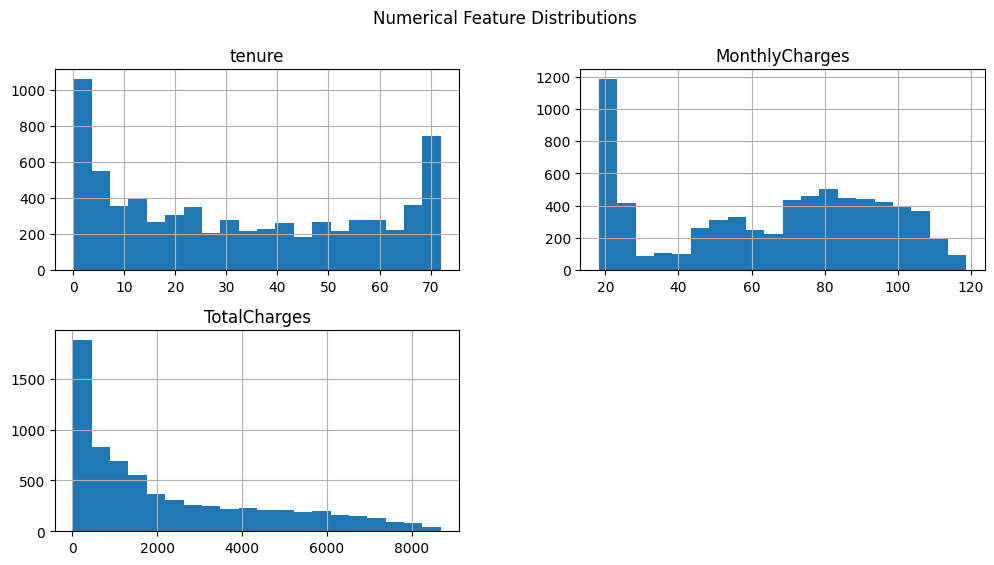

In [16]:
#Numerical Feature Distribution
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_features].hist(bins=20, figsize=(12,6))
plt.suptitle('Numerical Feature Distributions')
plt.show

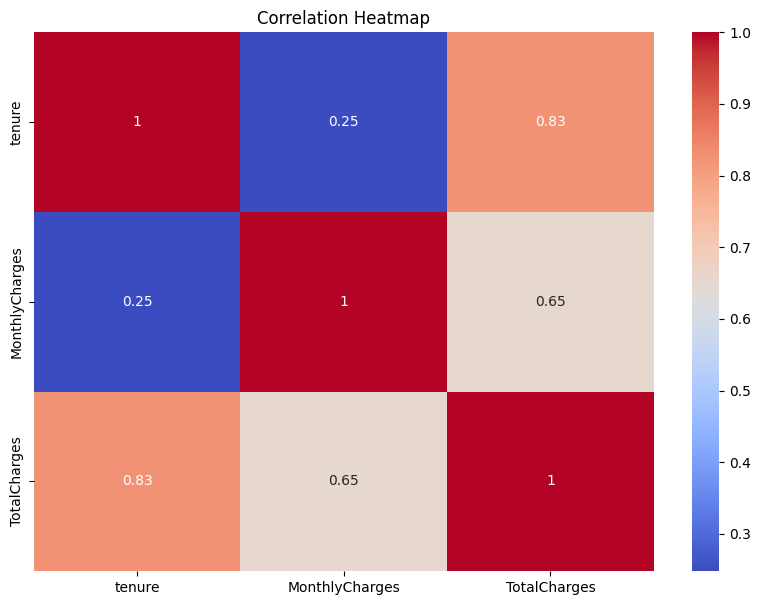

In [17]:
#Correlation Heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

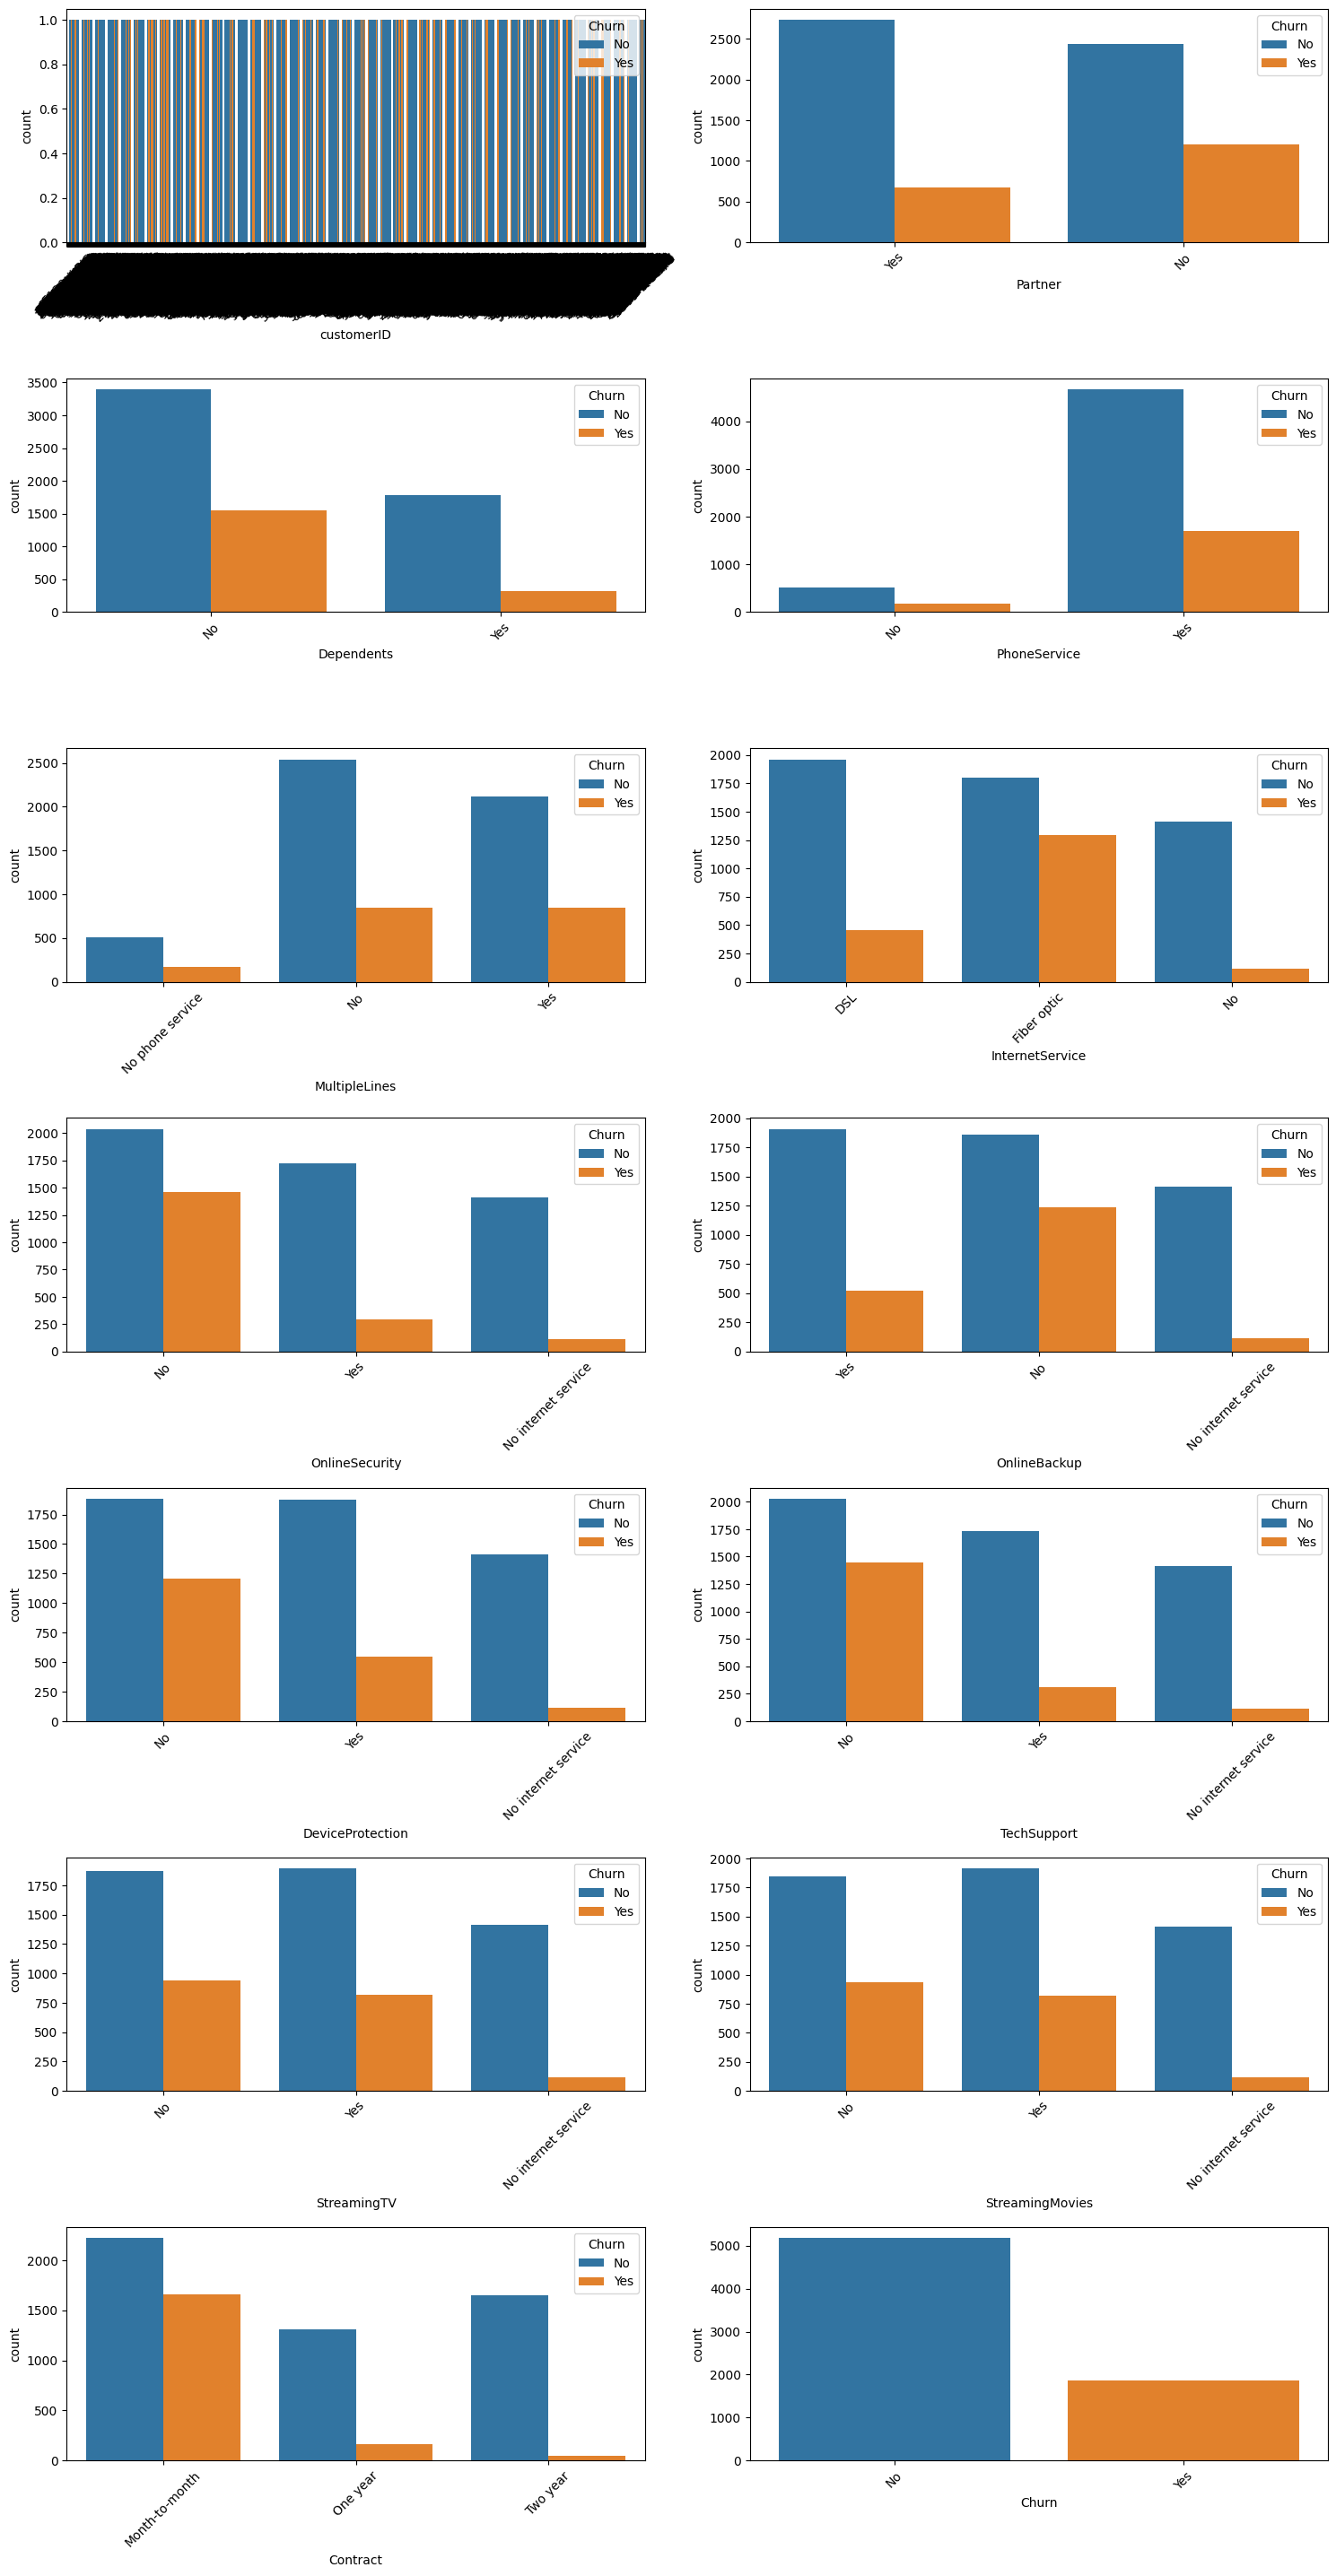

In [18]:
#Categorical feature distribution
cat_cols = df.select_dtypes(include='object').columns
plt.figure(figsize=(15,40))
for i, col in enumerate(cat_cols):
  plt.subplot(10,2,i+1)
  sns.countplot(x=col, data=df, hue="Churn")
  plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
#Encoding Data
from sklearn import preprocessing

#Partner
le_partner = preprocessing.LabelEncoder()
if df['Partner'].dtype == 'object':
   le_partner.fit(['Yes','No'])
   df['Partner'] = le_partner.transform(df['Partner'])
   #Yes = 1, No = 0
else:
  print("Column Partner is already numeric")

#Dependents
le_dependents = preprocessing.LabelEncoder()
if df['Dependents'].dtype == 'object':
   le_dependents.fit(['Yes','No'])
   df['Dependents'] = le_dependents.transform(df['Dependents'])
   #Yes = 1, No = 0
else:
  print("Column Dependents is already numeric")

#PhoneService
le_phoneService = preprocessing.LabelEncoder()
if df['PhoneService'].dtype == 'object':
   le_phoneService.fit(['Yes','No'])
   df['PhoneService'] = le_phoneService.transform(df['PhoneService'])
   #Yes = 1, No = 0
else:
  print("Column PhoneService is already numeric")

#MultipleLines
le_multipleLines = preprocessing.LabelEncoder()
if df['MultipleLines'].dtype == 'object':
   le_multipleLines.fit(['Yes','No','No phone service'])
   df['MultipleLines'] = le_multipleLines.transform(df['MultipleLines'])
   #Yes = 2, No = 1, No phone service = 0
else:
  print("Column MultipleLines is already numeric")

#InternetService
le_internetService = preprocessing.LabelEncoder()
if df['InternetService'].dtype == 'object':
   le_internetService.fit(['DSL','Fiber optic','No'])
   df['InternetService'] = le_internetService.transform(df['InternetService'])
   #DSL = 0, Fibre Optic = 1, No = 2
else:
  print("Column InternetService is already numeric")

#OnlineSecurity
le_onlineSecurity = preprocessing.LabelEncoder()
if df['OnlineSecurity'].dtype == 'object':
   le_onlineSecurity.fit(['Yes','No','No internet service'])
   df['OnlineSecurity'] = le_onlineSecurity.transform(df['OnlineSecurity'])
   #No = 0, Yes = 2, No internet service = 1
else:
  print("Column OnlineSecurity is already numeric")

#OnlineBackup
le_onlineBackup = preprocessing.LabelEncoder()
if df['OnlineBackup'].dtype == 'object':
   le_onlineBackup.fit(['Yes','No','No internet service'])
   df['OnlineBackup'] = le_onlineBackup.transform(df['OnlineBackup'])
   #No = 0, Yes = 2, No internet service = 1
else:
  print("Column OnlineBackup is already numeric")

#DeviceProtection
le_deviceProtection = preprocessing.LabelEncoder()
if df['DeviceProtection'].dtype == 'object':
   le_deviceProtection.fit(['Yes','No','No internet service'])
   df['DeviceProtection'] = le_deviceProtection.transform(df['DeviceProtection'])
   #No = 0, Yes = 2, No internet service = 1
else:
  print("Column DeviceProtection is already numeric")

#TechSupport
le_techSupport = preprocessing.LabelEncoder()
if df['TechSupport'].dtype == 'object':
   le_techSupport.fit(['Yes','No','No internet service'])
   df['TechSupport'] = le_techSupport.transform(df['TechSupport'])
   #No = 0, Yes = 2, No internet service = 1
else:
  print("Column TechSupport is already numeric")

#StreamingTV
le_streamingTV = preprocessing.LabelEncoder()
if df['StreamingTV'].dtype == 'object':
   le_streamingTV.fit(['Yes','No','No internet service'])
   df['StreamingTV'] = le_streamingTV.transform(df['StreamingTV'])
   #No = 0, Yes = 2, No internet service = 1
else:
  print("Column StreamingTV is already numeric")

#StreamingMovies
le_streamingMovies = preprocessing.LabelEncoder()
if df['StreamingMovies'].dtype == 'object':
   le_streamingMovies.fit(['Yes','No','No internet service'])
   df['StreamingMovies'] = le_streamingMovies.transform(df['StreamingMovies'])
   #No = 0, Yes = 2, No internet service = 1
else:
  print("Column StreamingMovies is already numeric")

#Contract
le_contract = preprocessing.LabelEncoder()
if df['Contract'].dtype == 'object':
   le_contract.fit(['Month-to-month','One year','Two year'])
   df['Contract'] = le_contract.transform(df['Contract'])
   #Month-to-month = 0, One year = 1, Two year = 2
else:
  print("Column Contract is already numeric")

#Churn
le_churn = preprocessing.LabelEncoder()
if df['Churn'].dtype == 'object':
   le_churn.fit(['Yes','No'])
   df['Churn'] = le_churn.transform(df['Churn'])
   #Yes = 1, No = 0
else:
  print("Column Churn is already numeric")

In [20]:
df.head(5)

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,1,0,1,0,1,0,0,2,0,0,0,0,0,29.85,29.85,0
1,5575-GNVDE,0,0,0,34,1,0,0,2,0,2,0,0,0,1,56.95,1889.50,0
2,3668-QPYBK,0,0,0,2,1,0,0,2,2,0,0,0,0,0,53.85,108.15,1
3,7795-CFOCW,0,0,0,45,0,1,0,2,0,2,2,0,0,1,42.30,1840.75,0
4,9237-HQITU,0,0,0,2,1,0,1,0,0,0,0,0,0,0,70.70,151.65,1


In [38]:
#New Addition: Feature Engineering

#Tenure Groups
df['tenure_group'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 72],
                            labels=['0-1 yr', '1-2 yrs', '2-4 yrs', '4-6 yrs'],
                            include_lowest=True)
le_tenure_group = preprocessing.LabelEncoder()
df['tenure_group'] = le_tenure_group.fit_transform(df['tenure_group'].astype(str))

#Monthly Charges Category
df['monthly_charges_category'] = pd.cut(df['MonthlyCharges'], bins=[0, 35, 70, 200],
                                        labels=['Low', 'Medium', 'High'],
                                        include_lowest=True)
le_monthly_charges_category = preprocessing.LabelEncoder()
df['monthly_charges_category'] = le_monthly_charges_category.fit_transform(df['monthly_charges_category'].astype(str))

#Total number of services
services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
            'StreamingTV', 'StreamingMovies', 'PhoneService', 'MultipleLines']
df['total_services'] = df[services].apply(lambda row: sum(row > 0), axis=1)

In [39]:
#Train_Test_Split
from sklearn.model_selection import train_test_split

X = df.drop(['Churn', 'customerID'], axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
#Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Decision Tree**

In [44]:
#Train Model

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#Crete model
clf = DecisionTreeClassifier(random_state=42, criterion='gini')

#Fit model
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [45]:
#Test Accuracy
predictions_test = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, predictions_test)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.7274662881476224


In [46]:
#Training Accuracy
predictions_train = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, predictions_train)
print(f"Training Accuracy: {train_accuracy}")

Training Accuracy: 0.9943201987930422


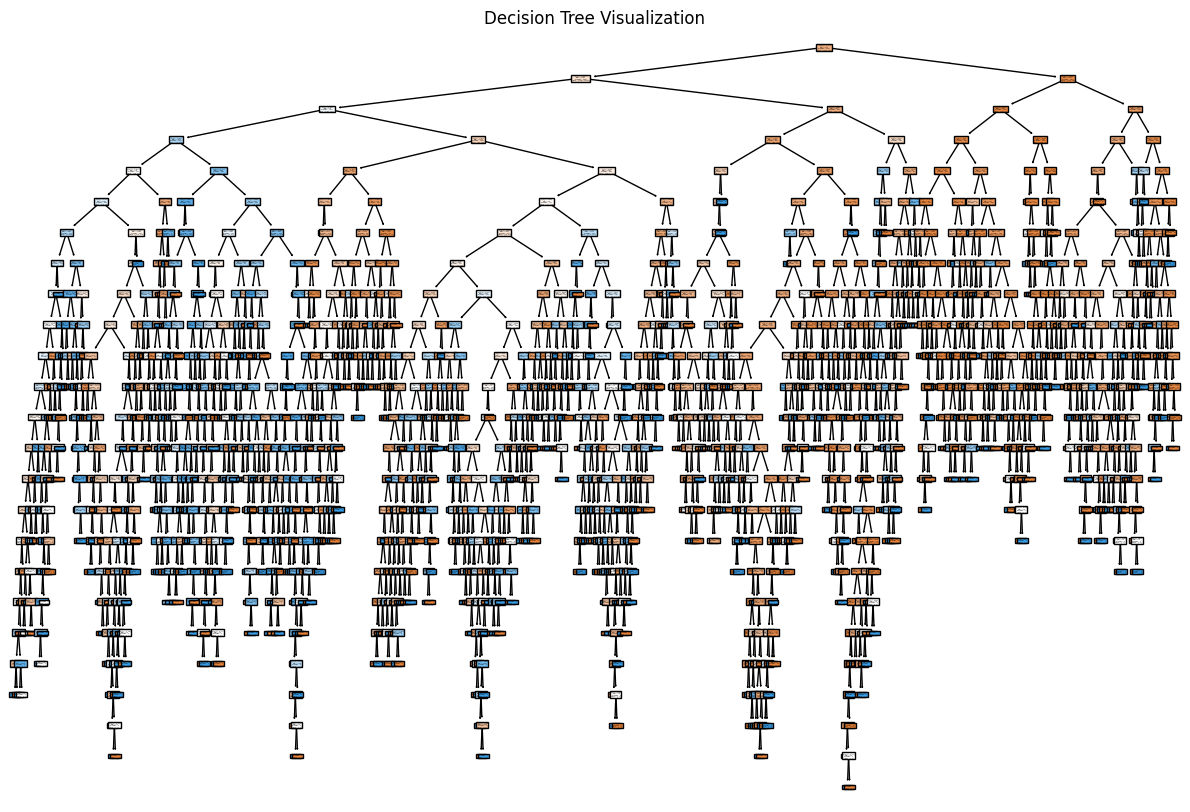

In [47]:
#Visualize Decision Tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plot_tree(clf, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

In [48]:
#Evaluation (Test set)
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:")
print(classification_report(y_test, predictions_test))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predictions_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1036
           1       0.49      0.50      0.49       373

    accuracy                           0.73      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.73      0.73      0.73      1409


Confusion Matrix:
[[840 196]
 [188 185]]


In [50]:
#Evaluation (Training set)
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:")
print(classification_report(y_train, predictions_train)) # Changed predictions_test to predictions_train

print("\nConfusion Matrix:")
print(confusion_matrix(y_train, predictions_train))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4138
           1       0.99      0.98      0.99      1496

    accuracy                           0.99      5634
   macro avg       0.99      0.99      0.99      5634
weighted avg       0.99      0.99      0.99      5634


Confusion Matrix:
[[4129    9]
 [  23 1473]]


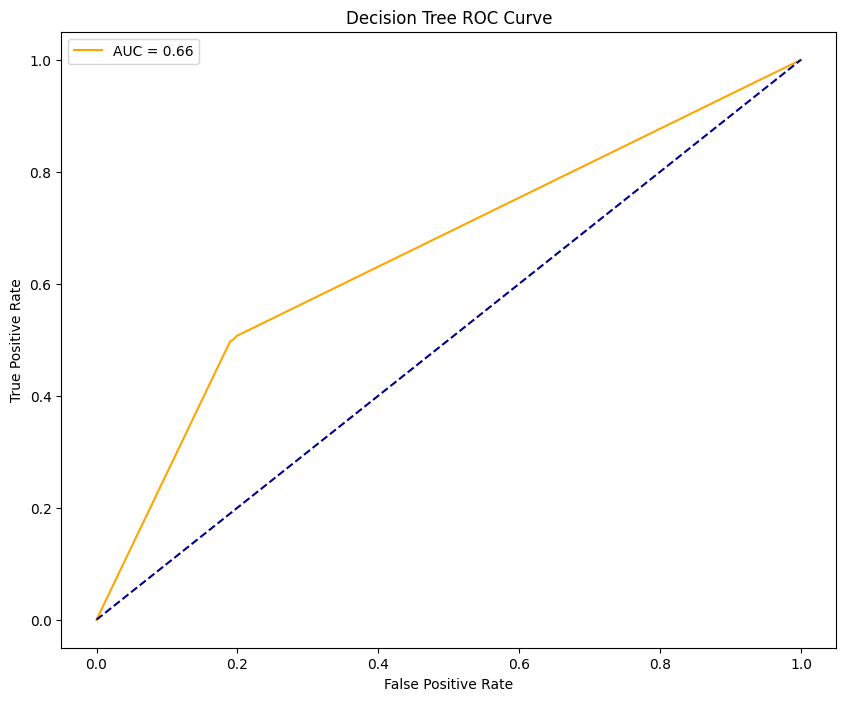

In [51]:
#ROC Curve
from sklearn.metrics import roc_curve, auc

dt_probs = clf.predict_proba(X_test)[:,1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt_probs)
auc_score_dt = auc(fpr_dt, tpr_dt)

def plot_roc_curve(fpr, tpr):
  plt.figure(figsize=(10,8))
  plt.plot(fpr, tpr, color='orange', label='AUC = %0.2f' % auc_score_dt)
  plt.plot([0,1], [0,1], color='darkblue', linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Decision Tree ROC Curve')
  plt.legend()
  plt.show()

plot_roc_curve(fpr_dt, tpr_dt)